In [23]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [12]:
edges = pd.read_csv('../../data/Flickr_sampled_edges/edges_sampled_2K.csv')
edges = edges.rename(columns = {edges.columns[0]: 'from', edges.columns[1]:'to'})

In [15]:
G = nx.from_pandas_edgelist(edges, 'from', 'to')

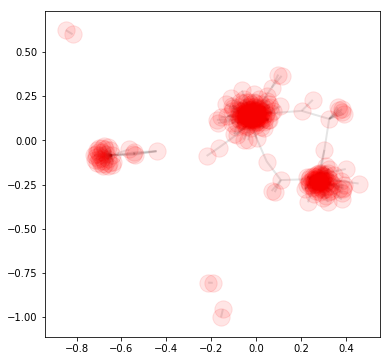

In [29]:
rcParams['figure.figsize'] = 6, 6
nx.draw_networkx(G, with_labels=False, alpha=0.1, width=2)

In [90]:
#keep removing edges from Graph until one of the connected components of Graph splits into two
#compute the edge betweenness
def CmtyGirvanNewmanStep(G):
    if _DEBUG_:
        print ("Calling CmtyGirvanNewmanStep")
    init_ncomp = nx.number_connected_components(G)    #no of components
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        bw = nx.edge_betweenness_centrality(G, weight='weight')    #edge betweenness for G
        #find the edge with max centrality
        max_ = max(bw.values())
        #find the edge with the highest centrality and remove all of them if there is more than one!
        for k, v in bw.items():
            if float(v) == max_:
                G.remove_edge(k[0],k[1])    #remove the central edge
        ncomp = nx.number_connected_components(G)    #recalculate the no of components

#compute the modularity of current split
def _GirvanNewmanGetModularity(G, deg_, m_):
    New_A = nx.adj_matrix(G)
    New_deg = {}
    New_deg = UpdateDeg(New_A, G.nodes())    
    #Let's compute the Q
    comps = nx.connected_components(G)    #list of components    
    print ('No of communities in decomposed G: %d' % nx.number_connected_components(G))
    Mod = 0    #Modularity of a given partitionning
    for c in comps:
        EWC = 0    #no of edges within a community
        RE = 0    #no of random edges
        for u in c:
            EWC += New_deg[u]
            RE += deg_[u]        #count the probability of a random edge
        Mod += ( float(EWC) - float(RE*RE)/float(2*m_) )
    Mod = Mod/float(2*m_)
    if _DEBUG_:
        print ("Modularity: %f" % Mod)
    return Mod

def UpdateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)  #len(A) ---> some ppl get issues when trying len() on sparse matrixes!
    B = A.sum(axis = 1)    
    for i in range(n):

        #print(i)
        #print (B[i])
        deg_dict[list(nodes)[i]] = B[i, 0]
    return deg_dict

#run GirvanNewman algorithm and find the best community split by maximizing modularity measure
def runGirvanNewman(G, Orig_deg, m_):
    #let's find the best split of the graph
    BestQ = 0.0
    Q = 0.0
    while True:    
        CmtyGirvanNewmanStep(G)
        Q = _GirvanNewmanGetModularity(G, Orig_deg, m_);
        print ("Modularity of decomposed G: %f" % Q)
        if Q > BestQ:
            BestQ = Q
            Bestcomps = nx.connected_components(G)    #Best Split
            print ("Components:", Bestcomps)
        if G.number_of_edges() == 0:
            break
    if BestQ > 0.0:
        print ("Max modularity (Q): %f" % BestQ)
        print ("Graph communities:", Bestcomps)
    else:
        print ("Max modularity (Q): %f" % BestQ)

    return BestQ, Bestcomps, Q


In [108]:
_DEBUG_ = False


edges = pd.read_csv('../../data/Flickr_sampled_edges/edges_sampled_2K.csv')
edges = edges.rename(columns = {edges.columns[0]: 'from', edges.columns[1]:'to'})
G = nx.from_pandas_edgelist(edges, 'from', 'to')

if _DEBUG_:
    print ('G nodes:', G.nodes())
    print ('G no of nodes:', G.number_of_nodes())

n = G.number_of_nodes()    #|V|
A = nx.adj_matrix(G)    #adjacenct matrix

m_ = 0.0    #the weighted version for number of edges
for i in range(0,n):
    for j in range(0,n):
        m_ += A[i,j]
m_ = m_/2.0
if _DEBUG_:
    print ("m: %f" % m_)

#calculate the weighted degree for each node
Orig_deg = {}
Orig_deg = UpdateDeg(A, G.nodes())

#run Newman alg
BestQ, Bestcomps, Q = runGirvanNewman(G, Orig_deg, m_)

No of communities in decomposed G: 6
Modularity of decomposed G: 0.411094
Components: <generator object connected_components at 0x7f33d4d75990>
No of communities in decomposed G: 7
Modularity of decomposed G: 0.412564
Components: <generator object connected_components at 0x7f33dda4bca8>
No of communities in decomposed G: 8
Modularity of decomposed G: 0.413805
Components: <generator object connected_components at 0x7f33d4d75990>
No of communities in decomposed G: 9
Modularity of decomposed G: 0.414294
Components: <generator object connected_components at 0x7f33dda4bca8>
No of communities in decomposed G: 10
Modularity of decomposed G: 0.414846
Components: <generator object connected_components at 0x7f33d4d75990>
No of communities in decomposed G: 21
Modularity of decomposed G: 0.413368
No of communities in decomposed G: 22
Modularity of decomposed G: 0.412896
No of communities in decomposed G: 23
Modularity of decomposed G: 0.413172
No of communities in decomposed G: 24
Modularity of de

No of communities in decomposed G: 158
Modularity of decomposed G: 0.297514
No of communities in decomposed G: 159
Modularity of decomposed G: 0.295403
No of communities in decomposed G: 160
Modularity of decomposed G: 0.293798
No of communities in decomposed G: 161
Modularity of decomposed G: 0.292651
No of communities in decomposed G: 162
Modularity of decomposed G: 0.290162
No of communities in decomposed G: 163
Modularity of decomposed G: 0.287364
No of communities in decomposed G: 164
Modularity of decomposed G: 0.284182
No of communities in decomposed G: 165
Modularity of decomposed G: 0.281767
No of communities in decomposed G: 166
Modularity of decomposed G: 0.281717
No of communities in decomposed G: 167
Modularity of decomposed G: 0.280340
No of communities in decomposed G: 168
Modularity of decomposed G: 0.278108
No of communities in decomposed G: 169
Modularity of decomposed G: 0.276078
No of communities in decomposed G: 170
Modularity of decomposed G: 0.275607
No of commun

No of communities in decomposed G: 272
Modularity of decomposed G: 0.060120
No of communities in decomposed G: 273
Modularity of decomposed G: 0.056707
No of communities in decomposed G: 275
Modularity of decomposed G: 0.055754
No of communities in decomposed G: 276
Modularity of decomposed G: 0.052237
No of communities in decomposed G: 277
Modularity of decomposed G: 0.049255
No of communities in decomposed G: 278
Modularity of decomposed G: 0.048091
No of communities in decomposed G: 279
Modularity of decomposed G: 0.044218
No of communities in decomposed G: 280
Modularity of decomposed G: 0.041336
No of communities in decomposed G: 281
Modularity of decomposed G: 0.038627
No of communities in decomposed G: 282
Modularity of decomposed G: 0.036169
No of communities in decomposed G: 283
Modularity of decomposed G: 0.034521
No of communities in decomposed G: 284
Modularity of decomposed G: 0.033327
No of communities in decomposed G: 285
Modularity of decomposed G: 0.031896
No of commun

In [79]:
list(nodes)[0]

27228

In [97]:
max(Bestcomps, key=len)

ValueError: max() arg is an empty sequence

In [106]:
BC = [c for c in sorted(Bestcomps)]

In [109]:
BC = list(Bestcomps)

In [111]:
len(BC)

318

In [103]:
BestQ

0.4148464470782681